In [2]:
import numpy as np
import pandas as pd


# Define the sample size


def generate_backdoor_df(sample_size = 500, seed = 123):
    np.random.seed(seed)
    true_ATE = 0.87
    # The first dataset
    W = np.random.randn(sample_size)
    X = 0.3*W + np.random.randn(sample_size)
    Y = 0.45*W + true_ATE *X + 0.4*np.random.randn(sample_size)

    # Note that we pass all the variables to the dataframe
    data_1 = pd.DataFrame(np.vstack([X, W, Y]).T, columns=['X', 'W', 'Y'])
    return data_1, true_ATE

# Code for plots

In [ ]:
df = generate_backdoor_df(sample_size = 500, seed = 123)
X= df.X
Y= df.Y
Z= df.Z
# Backdoor Criterion 
# Pr (Y = y|do(X = x)) = Σ_s Pr(S = s) Pr(Y = y|X = x, S = s) 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
x = np.linspace(-4, 4, 5000)

model = LinearRegression()

causal_effect_x_y = 0.87

model.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))
plt.scatter(X, Y, s=3, label='Observations' )
plt.plot(x, causal_effect_x_y * x,  '-g',  label=f"E[Y|do(x)] = {causal_effect_x_y: .2f} (true)")
print( model.coef_)
plt.plot(x, model.coef_[0,0]* x,  '-r', label=f"E[Y|X] = {model.coef_[0,0]:.2f} (biased)")
plt.legend(loc="upper left")


In [ ]:
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns


iterations=5000
"""
Calculates the Markov Chain Monte Carlo trace of
a Generalised Linear Model Bayesian linear regression 
model on supplied data.
Parameters
----------
df: `pd.DataFrame`
    DataFrame containing the data
iterations: `int`
    Number of iterations to carry out MCMC for
"""
# Create the glm using the Bambi model syntax
model = bmb.Model("Y ~ X + W", df)
# Fit the model using a NUTS (No-U-Turn Sampler) 
trace = model.fit(
    draws= iterations,
    tune=500,
    discard_tuned_samples=True,
    chains=1, 
    progressbar=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [Y_sigma, Intercept, X, W]


Sampling 1 chain for 500 tune and 5_000 draw iterations (500 + 5_000 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'X'}>]],
      dtype=object)

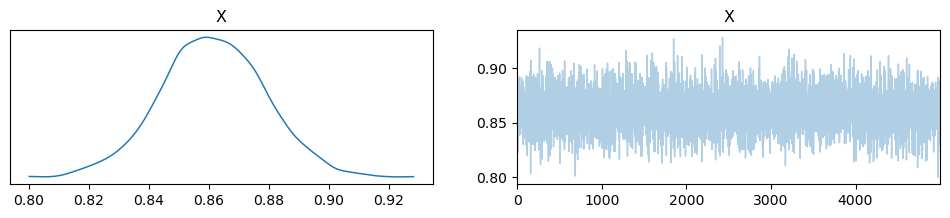

In [ ]:
pm.plot_trace(trace.posterior["X"])

# Checking for convergence for different N

In [3]:
def generate_test_df(N = 2000):    
    X_do_x = np.linspace(-2.5, 2.5, N)
    EV_y_do_x  = 0.87 * X_do_x
    return X_do_x, EV_y_do_x  

In [ ]:
def linear_gp_bd_cont_t_ate(df):
    import bambi as bmb
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import pymc as pm
    import seaborn as sns

    iterations= 2500

    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression 
    model on supplied data.
    Parameters
    ----------
    df: `pd.DataFrame`
        DataFrame containing the data
    iterations: `int`
        Number of iterations to carry out MCMC for
    """
    # Create the glm using the Bambi model syntax
    model = bmb.Model("Y ~ X + W", df)

    trace = model.fit(
        draws= iterations,
        tune=400,
        discard_tuned_samples=True,
        chains=1,
        progressbar= False)
    ate = trace.posterior["X"].to_numpy().mean()
    #beta_W =  trace.posterior["W"].to_numpy().mean()
    #intercept = trace.posterior.Intercept.to_numpy().mean()
    return ate 

In [ ]:
import random
#random_seeds = random.sample(range(1, 10000), 200)
random_seeds = [9737, 4855, 2226, 5915, 7910, 9309, 8115, 7492, 2493, 4350, 5, 1170, 6791, 5260, 9522, 46, 4384, 6104, 2214, 9654, 2311, 1484, 923, 433, 5815, 4374, 7743, 121, 5610, 6243, 4191, 1608, 1288, 2628, 1079, 3022, 9831, 7185, 3979, 4495, 4231, 7596, 6292, 5460, 7609, 7036, 2163, 3578, 7048, 7082, 9724, 7236, 8688, 6425, 2126, 289, 4618, 973, 6260, 6591, 6387, 1472, 6728, 237, 8464, 3930, 2561, 4123, 1007, 7543, 3451, 6176, 4836, 3637, 2425, 7111, 5567, 3191, 6353, 4521, 6140, 9860, 7053, 72, 5053, 3991, 2629, 6217, 3510, 4163, 5366, 2876, 1923, 4170, 7730, 8429, 6262, 3953, 5697, 58, 8885, 7928, 291, 3625, 7530, 8693, 7217, 7376, 9543, 4018, 7791, 7333, 9983, 6913, 8605, 38, 1779, 7950, 9857, 4767, 4267, 4789, 3610, 5346, 2057, 7929, 2223, 5286, 5499, 5807, 3248, 3437, 731, 199, 138, 5943, 6664, 1711, 4391, 2891, 5144, 3611, 686, 2328, 3719, 9238, 652, 4052, 8192, 3346, 2723, 6854, 6719, 6684, 834, 4069, 3103, 5624, 2639, 7396, 7119, 7129, 189, 5648, 5290, 2282, 3432, 8405, 4589, 341, 2821, 7739, 4172, 2983, 2727, 5151, 6252, 1790, 4724, 1016, 3935, 4898, 4510, 8995, 66, 4660, 3368, 9559, 2538, 6884, 9086, 5356, 6048, 3285, 3098, 9802, 9977, 4878, 5406, 4343]

gp_ate_list_200 = []

i = 0
for seed in random_seeds:
    
    i = i + 1
    print(i)
    gp_ate_list = []
    from sklearn.metrics import mean_squared_error

    for N in [100, 500, 1000, 2000]:
        print(f'sample: {i},    sample size N:    ', N )
        df, true_ate =  generate_backdoor_df(sample_size = N, seed= seed)
        df.to_csv(f"datasets_bachelorthesis/backdoor_linear/ate/{N}/backdoor_linear_"+ str(i)+ '.csv', index= False)
        gp_ate = linear_gp_bd_cont_t_ate(df)
        gp_ate_list.append(np.abs( gp_ate -true_ate))

    


    gp_ate_list_200.append(gp_ate_list)


gp_ate_list_200_np = np.array(gp_ate_list_200)
gp_ate_results = np.mean(gp_ate_list_200_np, axis=0)


In [ ]:
def get_mean_err_sem(gp_ate_list,true_ATE):
    import scipy
    sem_gp_ate = scipy.stats.sem(np.array(gp_ate_list) - np.full((len(gp_ate_list),),true_ATE))

    mean_error_gp_rbf = np.mean(np.array(gp_ate_list))
    return str(mean_error_gp_rbf) + "+-" +str( sem_gp_ate)

In [ ]:
gp_results_str = np.apply_along_axis(get_mean_err_sem, 0, gp_ate_list_200_np, true_ATE= true_ate)
print(gp_results_str)

['0.03231156120776224+-0.001857044182372064'
 '0.014425794466418927+-0.00078091059011724'
 '0.010105574777692184+-0.00053567505001305'
 '0.0070762054744728875+-0.0003804680713458']
